# Problem Set 3 - Arath Reyes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, uniform
import warnings
warnings.filterwarnings('ignore')

## P6

(c) Set the true $\theta$ to 1. Repeat the following steps for n = 20, 100, 1000:

i. Use a random number generator to draw 10,000 samples of length n from $U(0, \theta)$ and compute the MLE and MM estimators of $\theta$ for each of the 10,000 samples.

ii. Plot the histograms of the 10,000 MLE and MM estimators, respectively.

iii. Compute the mean, bias and standard error of the MLE and MM estimators in the simulated data.

In [5]:
sample = pd.DataFrame()
for m in range(1_000):
    sample[f'U({m+1})'] = uniform.rvs(0,1, size = 10_000)

In [6]:
mm = 2*sample.mean()
mle = sample.max()
mm_1000, mm_100, mm_20 = mm, mm.iloc[:100], mm.iloc[:20]
mle_1000, mle_100, mle_20 = mle, mle.iloc[:100], mle.iloc[:20]

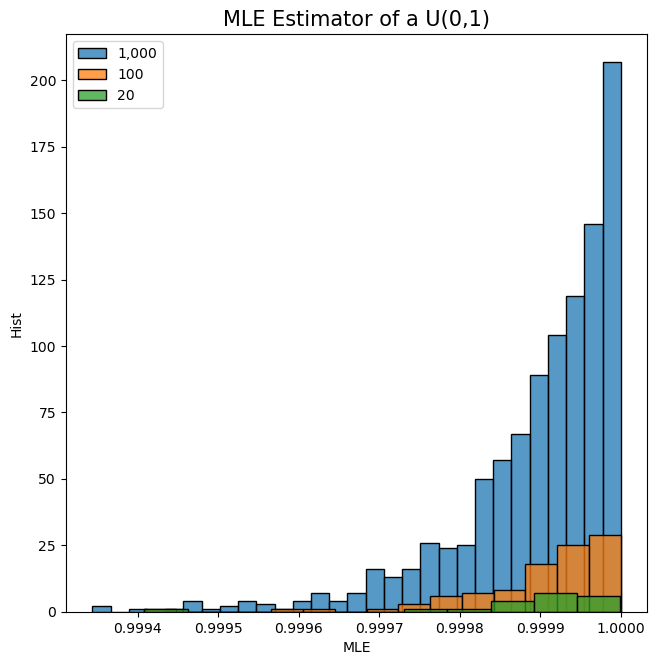

In [7]:
plt.figure(figsize=(7.5,7.5))
ax = sns.histplot(mle_1000, label = '1,000')
sns.histplot(mle_100, label = '100', ax = ax)
sns.histplot(mle_20, label = '20', ax = ax)
ax.set_title(f'MLE Estimator of a U(0,1)',fontsize = 15)
ax.set_xlabel('MLE',fontsize = '10')
ax.set_ylabel('Hist',fontsize = '10')
plt.legend()

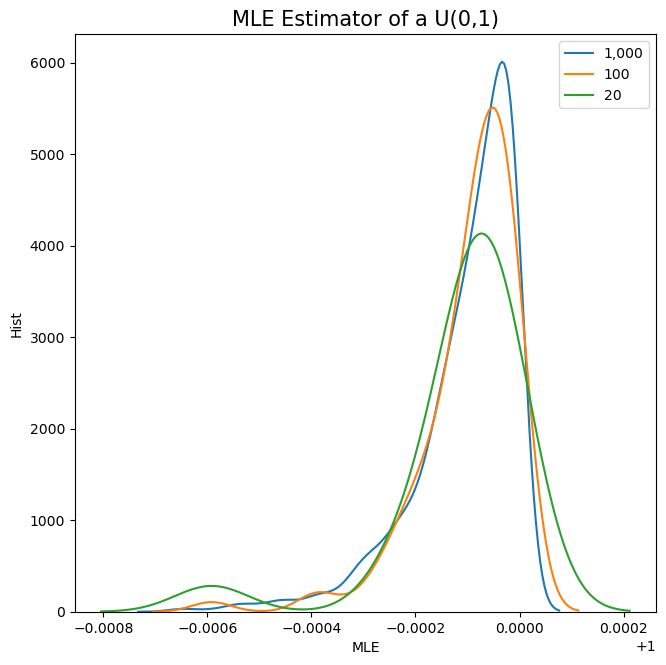

In [8]:
plt.figure(figsize=(7.5,7.5))
ax = sns.kdeplot(mle_1000, label = '1,000')
sns.kdeplot(mle_100, label = '100', ax = ax)
sns.kdeplot(mle_20, label = '20', ax = ax)
ax.set_title(f'MLE Estimator of a U(0,1)',fontsize = 15)
ax.set_xlabel('MLE',fontsize = '10')
ax.set_ylabel('Hist',fontsize = '10')
plt.legend()

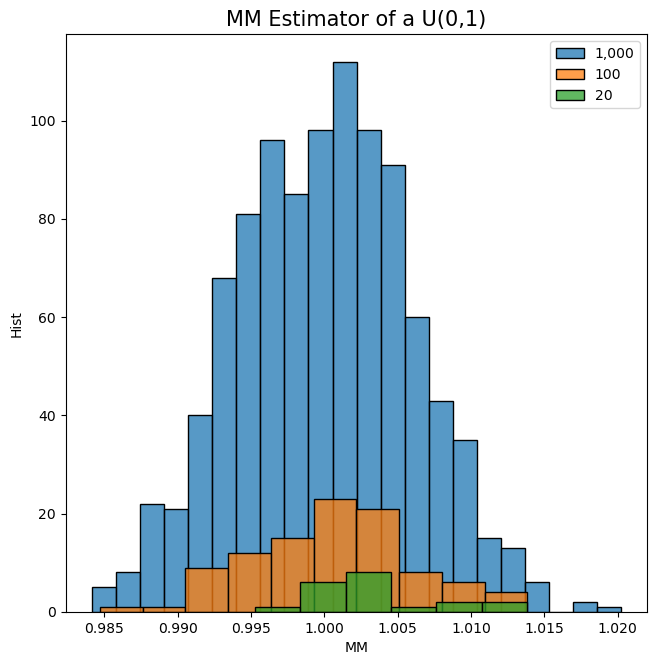

In [9]:
plt.figure(figsize=(7.5,7.5))
ax = sns.histplot(mm_1000, label = '1,000')
sns.histplot(mm_100, label = '100', ax = ax)
sns.histplot(mm_20, label = '20', ax = ax)
ax.set_title(f'MM Estimator of a U(0,1)',fontsize = 15)
ax.set_xlabel('MM',fontsize = '10')
ax.set_ylabel('Hist',fontsize = '10')
plt.legend()

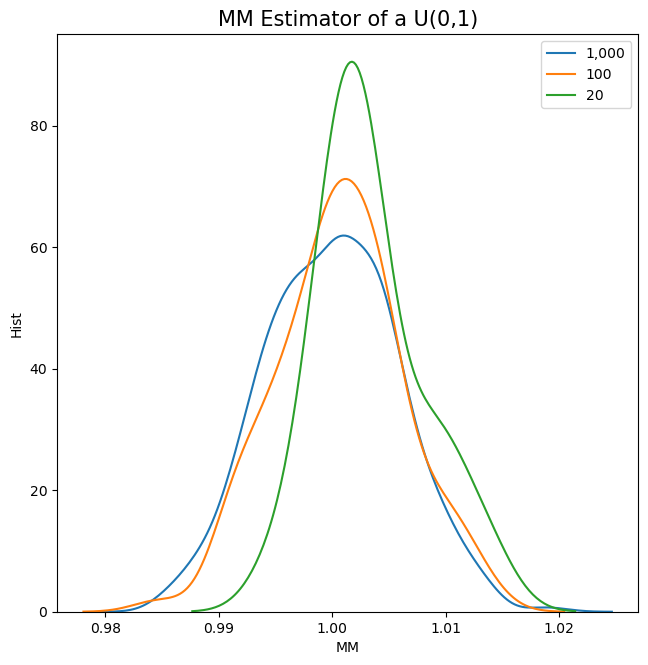

In [10]:
plt.figure(figsize=(7.5,7.5))
ax = sns.kdeplot(mm_1000, label = '1,000')
sns.kdeplot(mm_100, label = '100', ax = ax)
sns.kdeplot(mm_20, label = '20', ax = ax)
ax.set_title(f'MM Estimator of a U(0,1)',fontsize = 15)
ax.set_xlabel('MM',fontsize = '10')
ax.set_ylabel('Hist',fontsize = '10')
plt.legend()

In [11]:
mm_stats = pd.DataFrame(columns = ['Mean', 'Bias', 'Standard Error'], index = [20, 100, 1_000])
for data, n in zip([mm_20, mm_100, mm_1000], [20, 100, 1_000]):
    mm_stats['Mean'][n] = data.mean()
    mm_stats['Bias'][n] = data.mean() - 1
    mm_stats['Standard Error'][n] = data.std()

In [12]:
mm_stats

,Mean,Bias,Standard Error
20,1.003375,0.003375,0.004609
100,1.000638,0.000638,0.005549
1000,0.999994,-0.000006,0.00591


In [13]:
mle_stats = pd.DataFrame(columns = ['Mean', 'Bias', 'Standard Error'], index = [20, 100, 1_000])
for data, n in zip([mle_20, mle_100, mle_1000], [20, 100, 1_000]):
    mle_stats['Mean'][n] = data.mean()
    mle_stats['Bias'][n] = data.mean() - 1
    mle_stats['Standard Error'][n] = data.std()

In [14]:
mle_stats

,Mean,Bias,Standard Error
20,0.99989,-0.00011,0.000129
100,0.999904,-0.000096,0.000095
1000,0.999897,-0.000103,0.000101


d) For each n, compare the properties of the MLE and MM estimators in these simulations to their theoretical distributions.

Notice that the MM estimator presents a bell curve shape, resembling a normal distribution, centered at 1 and with a varince that reduces as n increases. Meanwhile, the MLE estimator shows an asymetrical distribution, where is accumulates most of its density around 1, where the variance reduces as n increas and thus it tends more rapidly to approach to 1.

(e) Which properties of the estimators in the simulated data are expected, i.e. close to
their theoretical properties, and which ones are not?

**MM:** This estimator showed all expected properties as stated above, meaning to have a normal distribution centered at 1 and to which its variance decreases as n increases.

**MLE:** I mentioned that this estimator converges asymp. to the constant value $\theta$, 1 in this case, which it seems to be the case as most of the density seems to be accumulated around 1 and as n increases the greater the probability that it takes 1 as values. Although, its worth mentioning that if we'd use straight up the Theorem 10 shown in class we could have expected a normal distribution for this estimator, which clearly isnt the case, as this distribution is skewed and not symmetrical.